<a href="https://colab.research.google.com/github/rddiasbk/An-lise-de-Portif-lio-Imobili-rio/blob/main/An%C3%A1lise_de_Portf%C3%B3lio_Imobili%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Portifólio Imobiliário utilizando o dataset: House Sales in King County, USA
disponível no [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)



[Dicionário de atributos](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885)

# Carregando o Dataframe.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dados-Datas/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Formatando o dataframe

### Transformado as casas decimais para melhor visualização dos valores.

In [29]:
pd.options.display.float_format = '{:,.2f}'.format
#formata as casas decimais

In [30]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2,level
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,0,1955,0,98178,47.51,-122.26,1340,5650,109.74,standard
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,400,1951,1991,98125,47.72,-122.32,1690,7639,239.01,standard
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,0,...,0,1933,0,98028,47.74,-122.23,2720,8062,71.61,standard
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,910,1965,0,98136,47.52,-122.39,1360,5000,182.28,high_standard
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,0,1987,0,98074,47.62,-122.05,1800,7503,156.24,standard


### Transformando a coluna date de objeto para data.

- Utiliza a função do pandas `.to_datetime()` e guarda na coluna date do DF
- Converte para o padrão D-M-Y brasileiro através do `.dt.strftime()`
- Erro ao buscar a data mais antiga se utilizar a fórmula: `df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y')`.

In [6]:
df['date'] = pd.to_datetime(df['date'])

# 1) Quantas casas estão disponíveis?
- **Solução**: Contar o número de Ids distintos.
- Outra opção é utilizar `len(df.id.unique())` - ou dar `drop_duplicates` e ver através do `len`

### **Resposta:** Estão disponíveis 21.436 casas

In [7]:
df.id.nunique()


21436

# 2) Quantos atributos as casas possuem?
**Solução:** Contar o número de colunas:

### **Resposta:** O portifólio possui 21 atributos. Os 11 mais relevantes em relação as casas estão dispostos a seguir: 


1.   Bedrooms 
2.   Bathrooms
3.   Sqft_living
4.   Sqft_lot
5.   Floors
6.   Waterfront
7.   View
8.   Condition
9.   Grade
10.  Sqft_above
11.  Sqft_basement 


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 3) Qual a casa mais cara do portfólio?

## **Solução**: 

*   Ordenar as linhas da colun `price` por valor.
*   Mostrar apenas as colunas `id` e `price` através de colchetes duplo.
*   Resetar o index para melhorar a visualização ao plotar no gráfico.
*   Mostrar apenas 5 resultados para agilizar o tempo de computação.
*   Passar como parâmetro do `reset_index(drop = True)` para eliminar a coluna `index` criada pelo pandas no reset.

### **Resposta:** A casa de ID 6762700020 é a mais cara com o valor de: 7,700,000.00

In [9]:
maior_valor = df[['id', 'price']].sort_values('price', ascending = False).reset_index(drop = True).head(5)
maior_valor

,id,price
0,6762700020,"7,700,000.00"
1,9808700762,"7,062,500.00"
2,9208900037,"6,885,000.00"
3,2470100110,"5,570,000.00"
4,8907500070,"5,350,000.00"


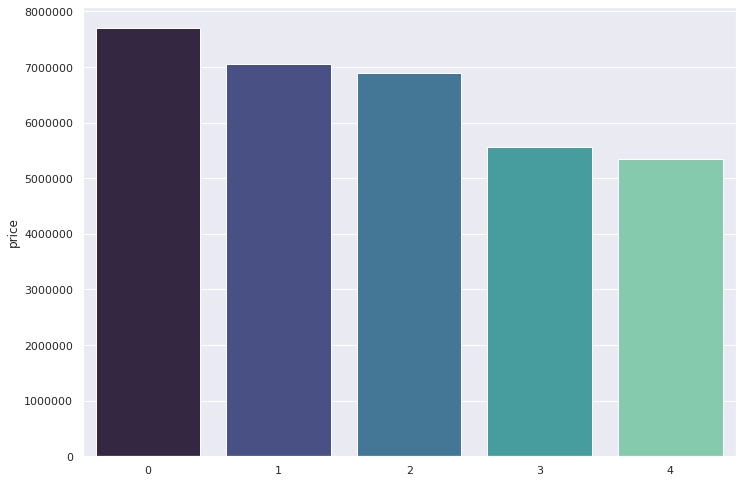

In [10]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
f,ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
sns.barplot(y="price", x=maior_valor.index,palette = 'mako',data=maior_valor)

#f,ax = plt.subplots()
#ax.ticklabel_format(style='plain', axis='both') - utilizei para mostrar os valores nas linhas do eixo y

## 4) Qual a casa com o maior número de quartos?

## **Solução**: Organizar as linhas pela coluna <bedrooms> - número de quartos

### **Resposta:** A casa de ID 2402100895 possui 33 quartos.

In [11]:
df[['id','bedrooms']].sort_values('bedrooms', ascending = False).head(3)

,id,bedrooms
15870,2402100895,33
8757,1773100755,11
15161,5566100170,10


### **Informação Adicional:** Casas agrupadas pelo quantidade de quartos.
O campo ID deve ser lido como "Quantidade de casas que apresentam X Quartos"

In [12]:
quartos_disponíveis = df[['id','bedrooms']].groupby('bedrooms').count().sort_values(by= 'bedrooms',ascending = False)
quartos_disponíveis 

,id
bedrooms,
33,1
11,1
10,3
9,6
8,13
7,38
6,272
5,1601
4,6882


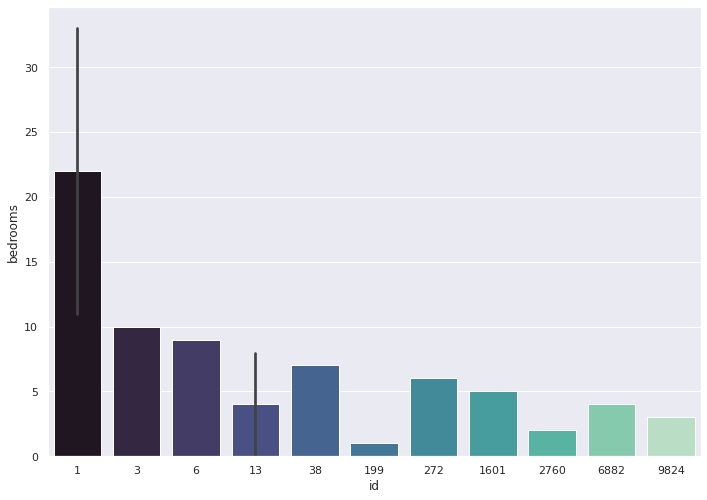

In [13]:
sns.barplot(y=quartos_disponíveis.index, x="id", palette = 'mako',data=quartos_disponíveis)

# 5) Qual a soma total de quartos do portfólio?

### **Resposta:** O portfólio possui 72.854 quartos.

In [14]:
df.bedrooms.sum()

72854

# 6) Quantas casas possuem 2 banheiros?

## **Solução:** Construição de uma query e contagem do resultado.

### **Resposta**: 1930 casas possuem 2 banheiros.
Pode ser feito: len(df.loc[df['bathroom'] == 2,['id'],['bathrooms']])

In [50]:
df.query('bathrooms == 2').count()['id']

1930

# 7) Qual o preço médio de todas as casas?

## **Solução:** Pode ser feito com describe, com a média da coluna ou do Df.

### **Resposta:** O preço médio das casas é de US$ 540,088.14 

In [16]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


id              4,580,301,520.86
price                 540,088.14
bedrooms                    3.37
bathrooms                   2.11
sqft_living             2,079.90
sqft_lot               15,106.97
floors                      1.49
waterfront                  0.01
view                        0.23
condition                   3.41
grade                       7.66
sqft_above              1,788.39
sqft_basement             291.51
yr_built                1,971.01
yr_renovated               84.40
zipcode                98,077.94
lat                        47.56
long                     -122.21
sqft_living15           1,986.55
sqft_lot15             12,768.46
dtype: float64

# 8) Qual o preço médio de casas com 2 banheiros?

### **Resposta:** O preço médio é USS 457,889.72

In [17]:
df.query('bathrooms == 2').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


id              4,586,917,121.70
price                 457,889.72
bedrooms                    3.31
bathrooms                   2.00
sqft_living             1,796.67
sqft_lot               14,227.94
floors                      1.29
waterfront                  0.00
view                        0.16
condition                   3.58
grade                       7.24
sqft_above              1,491.03
sqft_basement             305.64
yr_built                1,961.25
yr_renovated              145.69
zipcode                98,083.70
lat                        47.56
long                     -122.23
sqft_living15           1,736.83
sqft_lot15             12,044.89
dtype: float64

# 9) Qual o preço mínimo entre as casas com 3 quartos.

### **Resposta:** O menor valor é de US$ 82,000.00

In [18]:
df.query('bedrooms == 3').min()

id                           1200021
date             2014-05-02 00:00:00
price                      82,000.00
bedrooms                           3
bathrooms                       0.75
sqft_living                      490
sqft_lot                         572
floors                          1.00
waterfront                         0
view                               0
condition                          1
grade                              4
sqft_above                       490
sqft_basement                      0
yr_built                        1900
yr_renovated                       0
zipcode                        98001
lat                            47.16
long                         -122.52
sqft_living15                    399
sqft_lot15                       651
dtype: object

# 10) Quantas casas possuem mais de 300 metros quadrados de sala de estar.

**Solução:** É necessário fazer a conversão de squarefeet para m².
*   1 sqft = 0.093 m²
*   criar uma coluna 'm2' 

### **Resposta:**  21612 casas são maiores que 300. Apenas a casa de ID 3980300371 tem sala de estar menor que 300 metros. 
* Pode ser feito: len(df.loc[df['m2']> 300])

In [19]:
df['m2'] = df['sqft_living'] * 0.093

In [20]:
len(df.query('m2 > 300'))

2258

# 11) Quantas casas tem mais de 2 andares?

### **Resposta:** 782 casas.

In [21]:
df.query('floors > 2').count()

id               782
date             782
price            782
bedrooms         782
bathrooms        782
sqft_living      782
sqft_lot         782
floors           782
waterfront       782
view             782
condition        782
grade            782
sqft_above       782
sqft_basement    782
yr_built         782
yr_renovated     782
zipcode          782
lat              782
long             782
sqft_living15    782
sqft_lot15       782
m2               782
dtype: int64

# 12) Quantas casas tem vistas para o mar?

### **Resposta:** 163 casas com vista para o mar.

In [22]:
df.query('waterfront == 1').count()

id               163
date             163
price            163
bedrooms         163
bathrooms        163
sqft_living      163
sqft_lot         163
floors           163
waterfront       163
view             163
condition        163
grade            163
sqft_above       163
sqft_basement    163
yr_built         163
yr_renovated     163
zipcode          163
lat              163
long             163
sqft_living15    163
sqft_lot15       163
m2               163
dtype: int64

# 13) Das casas com vista para o mar, quantas tem 3 quartos? 

### **Resposta:** 64 casas com vista para o mar e 03 quartos.

In [54]:
df.query('waterfront == 1 & bedrooms == 3').count()['id']

64

# 14) Das casas com mais de 300 m² de sala de estar, quantas tem mais de 2 banheiros?

### **Resposta:** 2.201 casas.

In [53]:
df.query('m2 >= 300 & bathrooms > 2').count()['id']

2201

In [25]:
#df.sort_values(by = 'id')
#Da pra fazer uma limpeza melhor dos dados

# Perguntas de negócio: Parte 02.

# 1) Qual a data do imóvel mais antigo

### **Resposta:** As casas mais estão registradas na data 02/05/2014

In [26]:
df['date'].sort_values(ascending = False)
#df.sort_values('date') - é possível passar a coluna data como parâmetro.

16594   2015-05-27
13053   2015-05-24
5637    2015-05-15
928     2015-05-14
6197    2015-05-14
           ...    
20559   2014-05-02
7323    2014-05-02
12366   2014-05-02
9587    2014-05-02
8326    2014-05-02
Name: date, Length: 21613, dtype: datetime64[ns]

# 02) Quantos imóveis possuem o n° máximo de andares

  - Encontrar os andares e selecionar o maior utilizando `df.floors.unique()`.
  - Para contar quantos imóveis pelo andar: criar uma seleção: `df['floors'] == 3.5` que vai retornar um boolean.
  - Depois tem que passar isso como condição para o df fazer a filtragem dos valores `True`, ficando: `df[df['floors'] == 3.5]`
  - Por fim é possível passar uma lista para visualizar apenas as colunas desejadas.

### **Resposta:** 8 imóveis.

In [27]:
df[df['floors']==3.5][['floors','id']]

,floors,id
875,3.50,6306400140
10077,3.50,1972202010
11594,3.50,3180100023
14885,3.50,8673400177
15424,3.50,1702900664
18477,3.50,1346300150
20308,3.50,1972200426
20772,3.50,1972200428


# 3. Criar uma classificação para os imóveis
* Acima de RS540.000 -> alto padrão
* Abaixo -> baixo padrão
* Criar coluna low_standard e high_standard
    * Optei por fazer com `lambda` por ser mais prático.
    * Outra alternativa é criar uma coluna level com atribuição standard e passar a filtragem atribuindo a classificação high_standard: `df.loc[df['price']>540000,'level'] = 'high_standard']`

In [28]:
df['level'] = df['price'].apply(lambda x: 'standard' if x < 540000 else 'high_standard')


# 4) Relatório ordenado pelo preço e contendo as informações:
    * id 
    * data que o imóvel ficou disponível
    * n° quartos
    * tamanho total do terreno
    * preço
    * classificação
    * Selecionar colunas desejadas ou deletar as não desejadas.

In [ ]:
df[['id','date','bedrooms','price','level']].sort_values('price',ascending = False)

Exportando o relatório para csv

In [34]:
df.to_csv('relatório_solicitado.csv',sep = ';', index = False)

# 5) Um mapa de localização

Utilizando Plotly
* Parâmetros:
  * `hover_name` - informar nome ao passar o mouse por cima.
  * `hover_data` - informar um dado auxiliar
  * `color_discrete_sequence` `=['fuchsia']` - define a cor do ponto no mapa. 


In [37]:
data_mapa = df[['id','lat','long', 'price']]

In [41]:
mapa = px.scatter_mapbox(data_mapa, lat= 'lat', lon= 'long', hover_name = 'id',
hover_data = ['price'], color_discrete_sequence=['fuchsia'],
zoom = 3,
height = 300)

Melhorias no mapa com a função de layout:
Plotando com o estilo urbano.

In [ ]:
mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height = 600, margin={'r': 0, 't':0,'l':0, 'b':0})
#mapa.write('mapa_house_rocket.html)

Elementos extras que adicionei:
* Visualizações em Seaborn
* Formatação das casas decimais
* Formatação das datas para o padrão Dia-Mês-Ano
* Utilização de lambda para agilizar a classificação do padrão dos imóveis
